In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pd.read_csv('open_meteo.csv')
data['time'] = pd.to_datetime(data['time'], format='%m/%d/%Y')
data.head()

,Unnamed: 0,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,...,0,18.3,25.6,54,4.38,24.900002,67.0,8,Pakistan,Karachi
1,1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,...,0,24.6,35.3,64,3.84,24.900002,67.0,8,Pakistan,Karachi
2,2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,...,0,16.6,28.1,312,3.69,24.900002,67.0,8,Pakistan,Karachi
3,3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,...,0,14.0,22.7,353,3.63,24.900002,67.0,8,Pakistan,Karachi
4,4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,...,0,19.3,29.2,270,3.55,24.900002,67.0,8,Pakistan,Karachi


In [26]:
data = data[['time', 'city', 'latitude', 'temperature_2m_min', 'temperature_2m_max', 'temperature_2m_mean', 'precipitation_sum', 'precipitation_hours', 'et0_fao_evapotranspiration']]
data['precipitation_rate'] = data['precipitation_sum'] / data['precipitation_hours']
data['precipitation_rate'].fillna(0, inplace=True)
data.head()

,time,city,latitude,temperature_2m_min,temperature_2m_max,temperature_2m_mean,precipitation_sum,precipitation_hours,et0_fao_evapotranspiration,precipitation_rate
0,2010-01-01,Karachi,24.900002,14.8,26.0,20.9,0.0,0,4.38,0.0
1,2010-01-02,Karachi,24.900002,15.6,25.3,20.5,0.0,0,3.84,0.0
2,2010-01-03,Karachi,24.900002,14.3,25.0,19.9,0.0,0,3.69,0.0
3,2010-01-04,Karachi,24.900002,15.0,25.6,20.4,0.0,0,3.63,0.0
4,2010-01-05,Karachi,24.900002,16.3,25.4,20.7,0.0,0,3.55,0.0


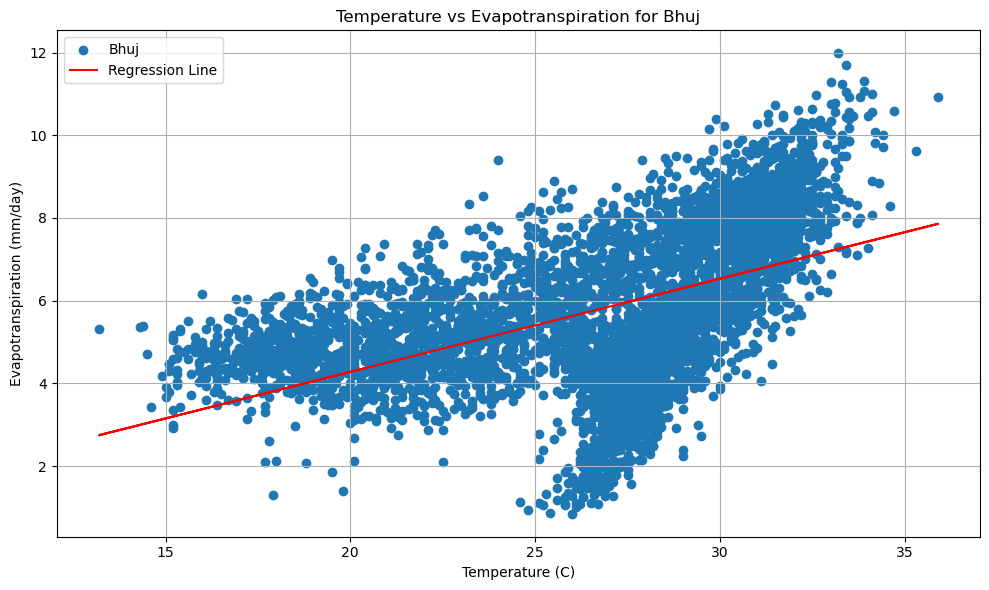

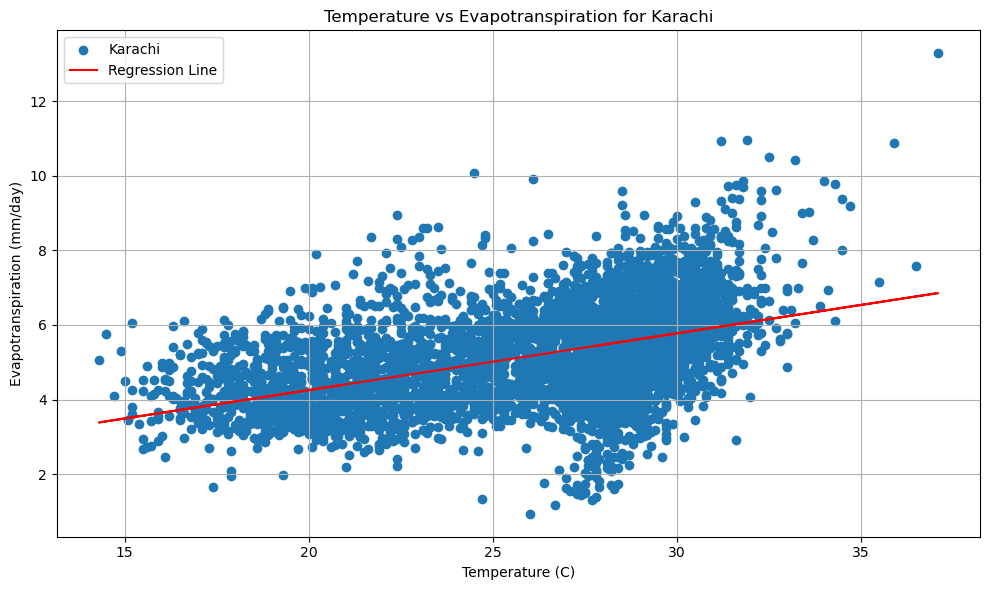

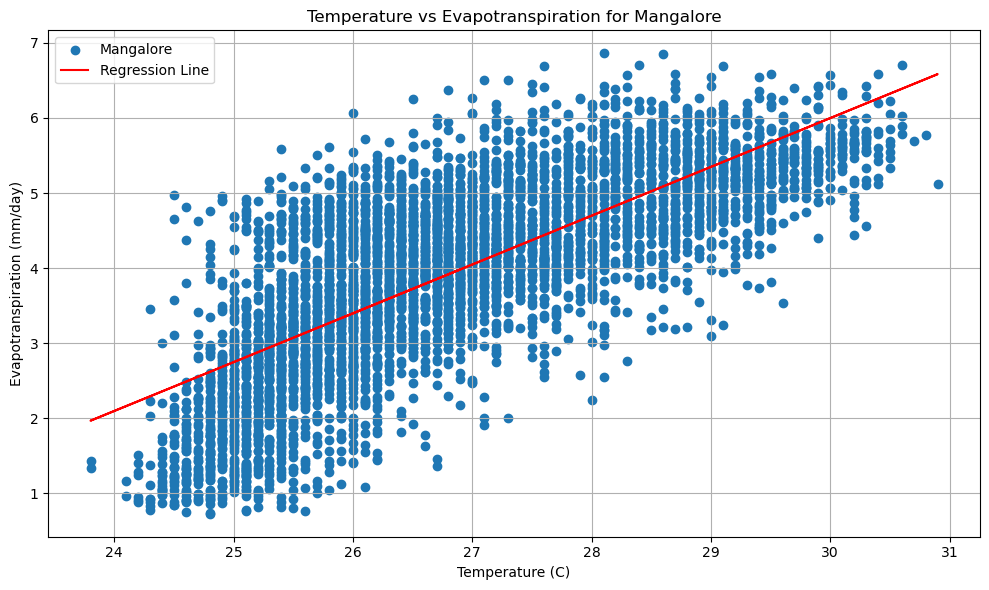

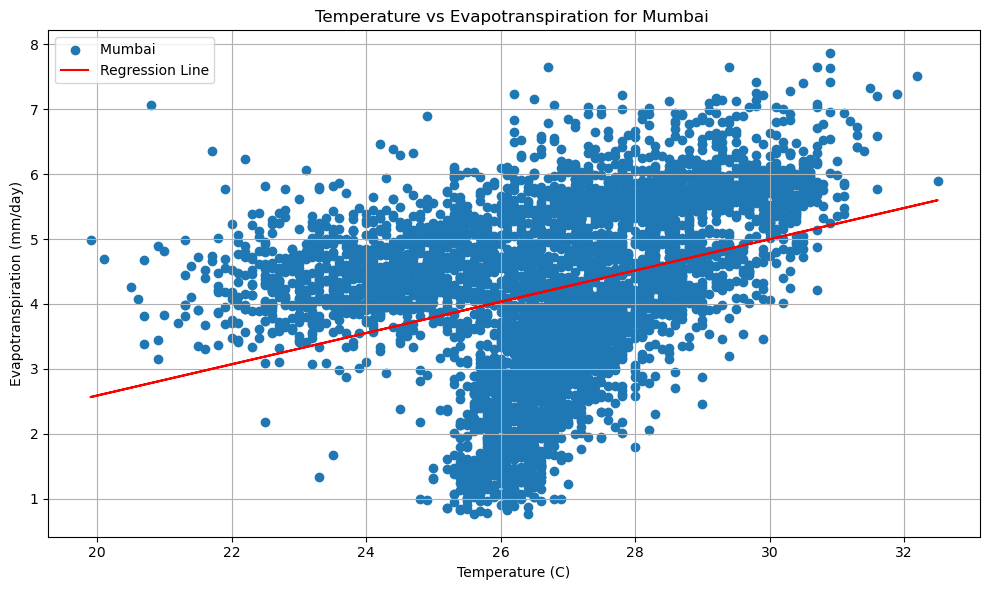

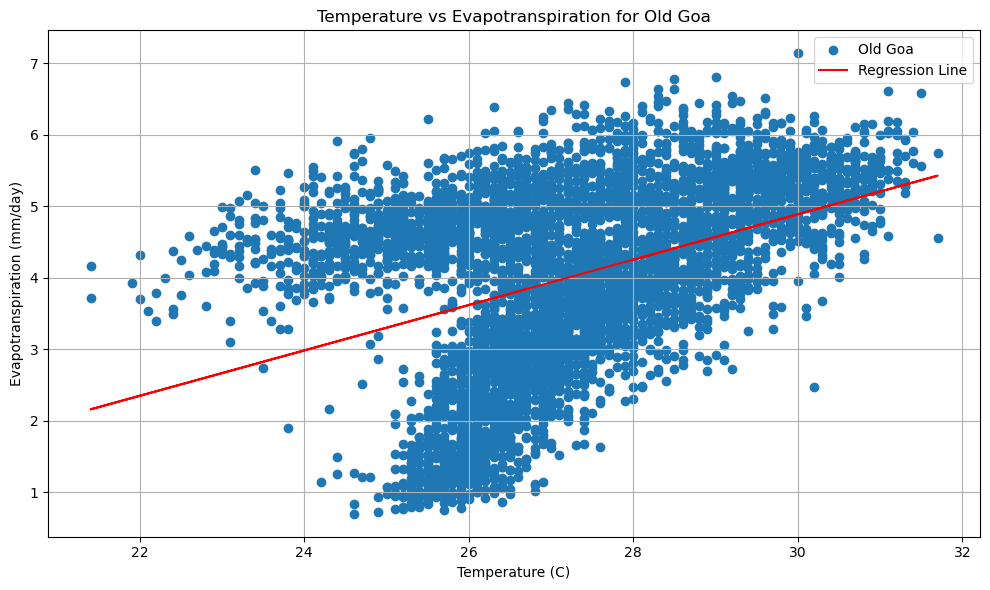

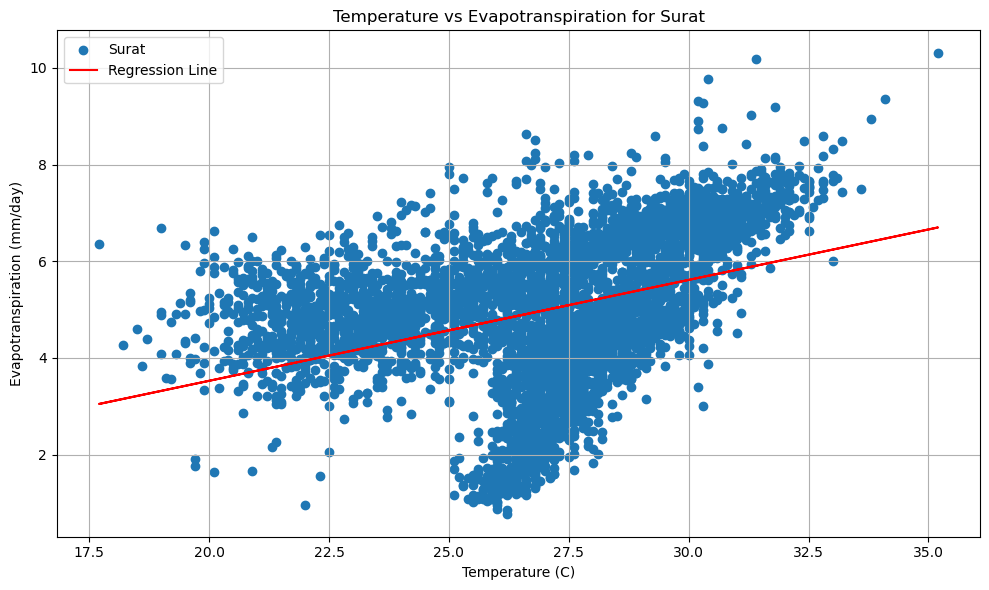

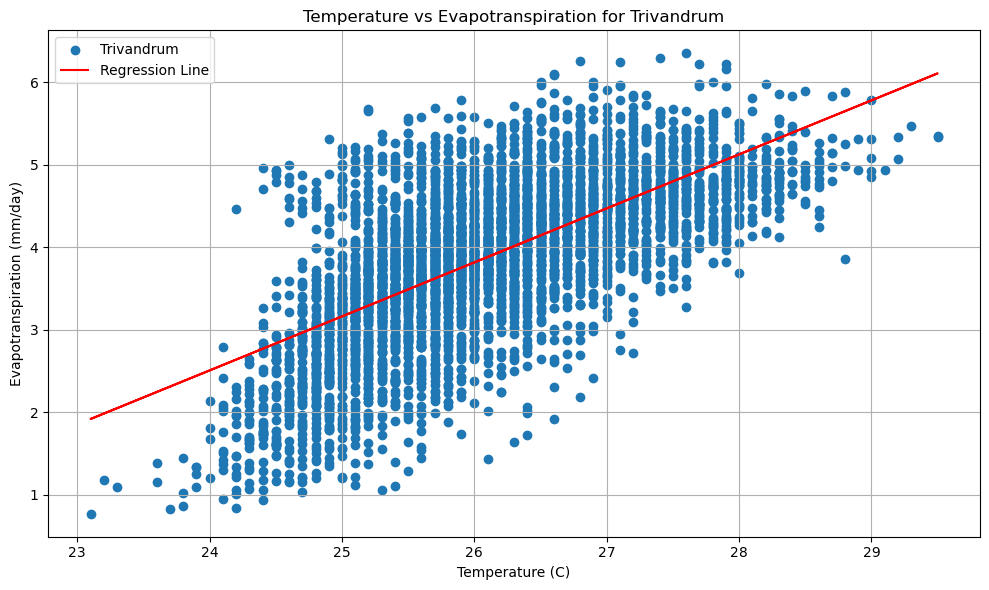

In [38]:
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['temperature_2m_mean'], group_data['et0_fao_evapotranspiration'], label=city)
    coefficients = np.polyfit(group_data['temperature_2m_mean'], group_data['et0_fao_evapotranspiration'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    regression_line = slope * group_data['temperature_2m_mean'] + intercept
    plt.plot(group_data['temperature_2m_mean'], regression_line, color='red', label='Regression Line')
    plt.title('Temperature vs Evapotranspiration for %s' % city)
    plt.xlabel('Temperature (C)')
    plt.ylabel('Evapotranspiration (mm/day)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

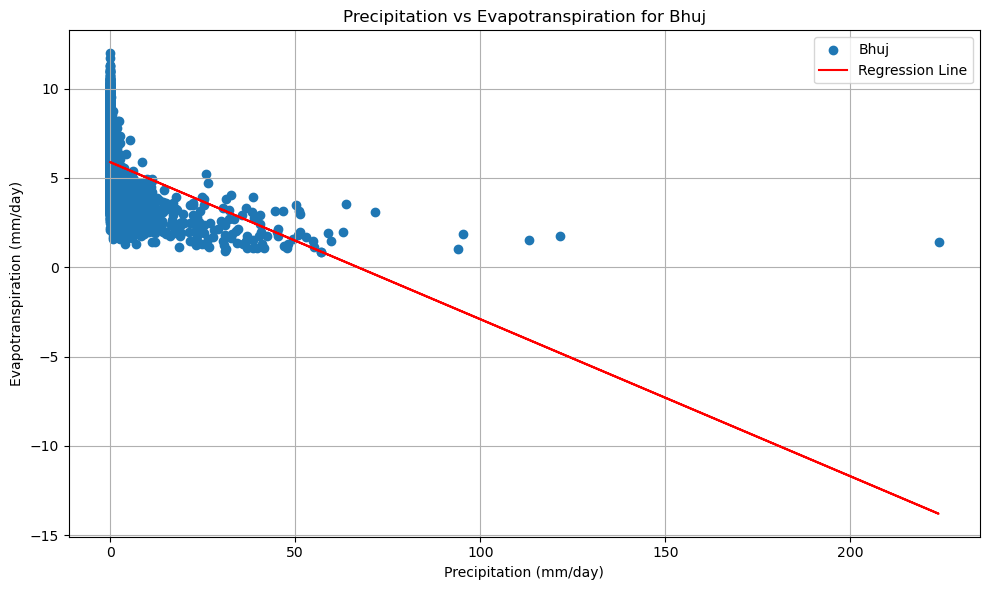

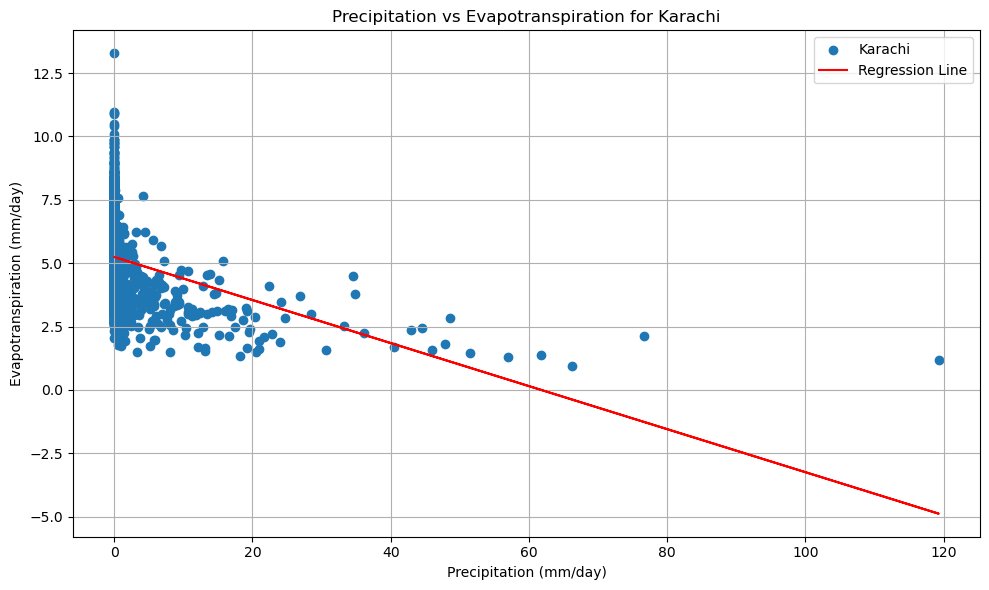

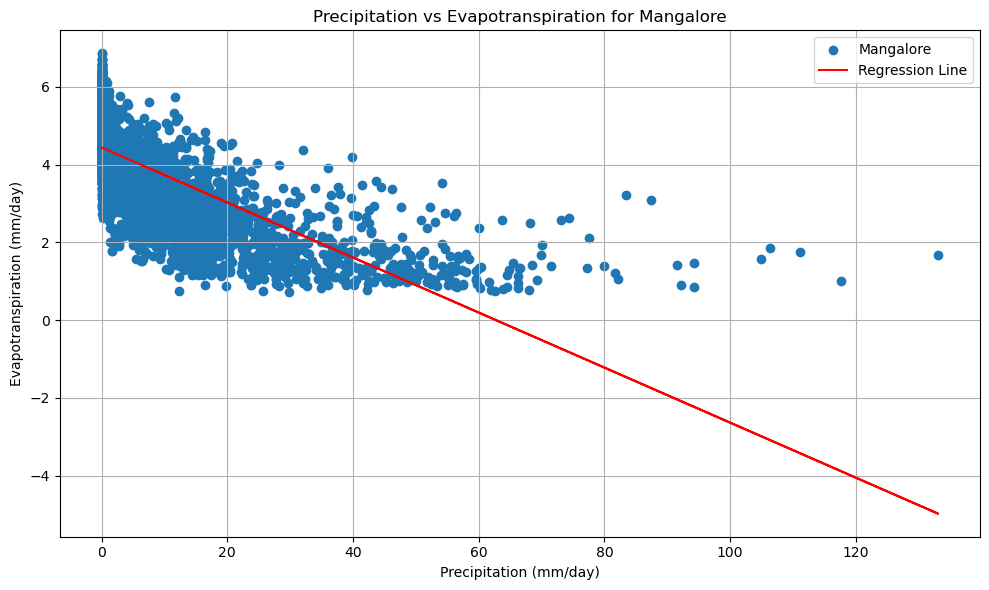

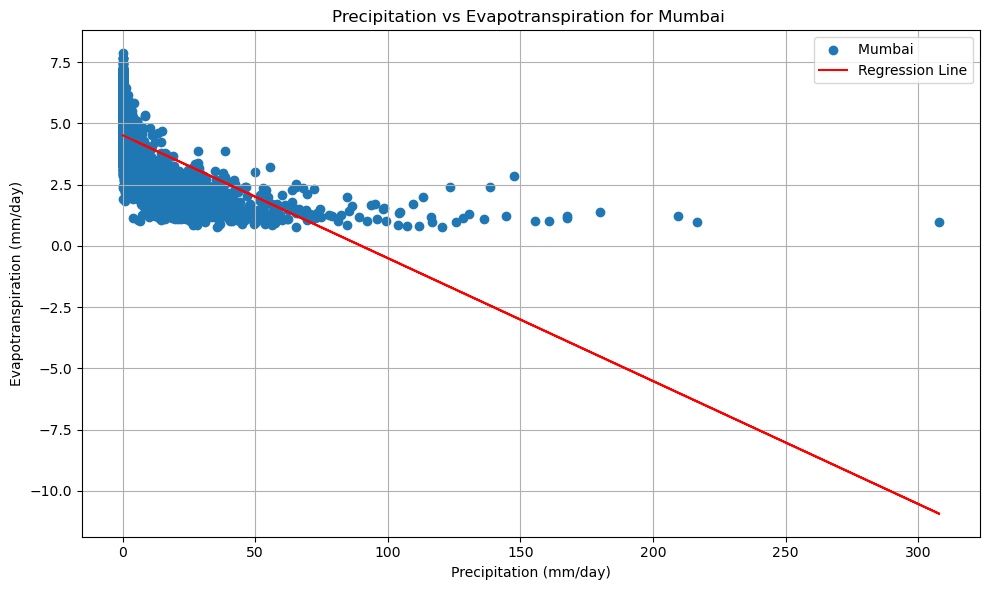

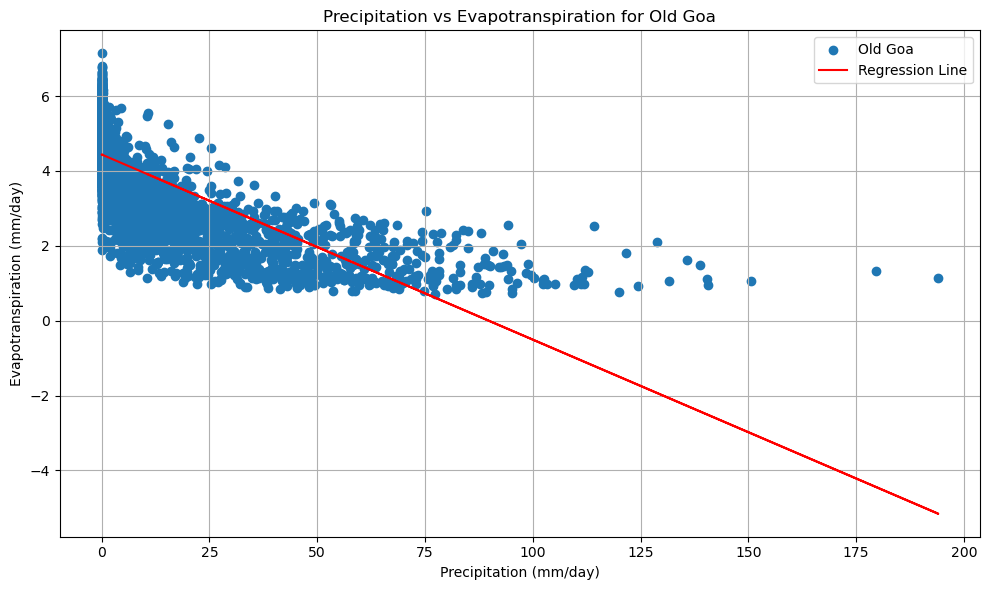

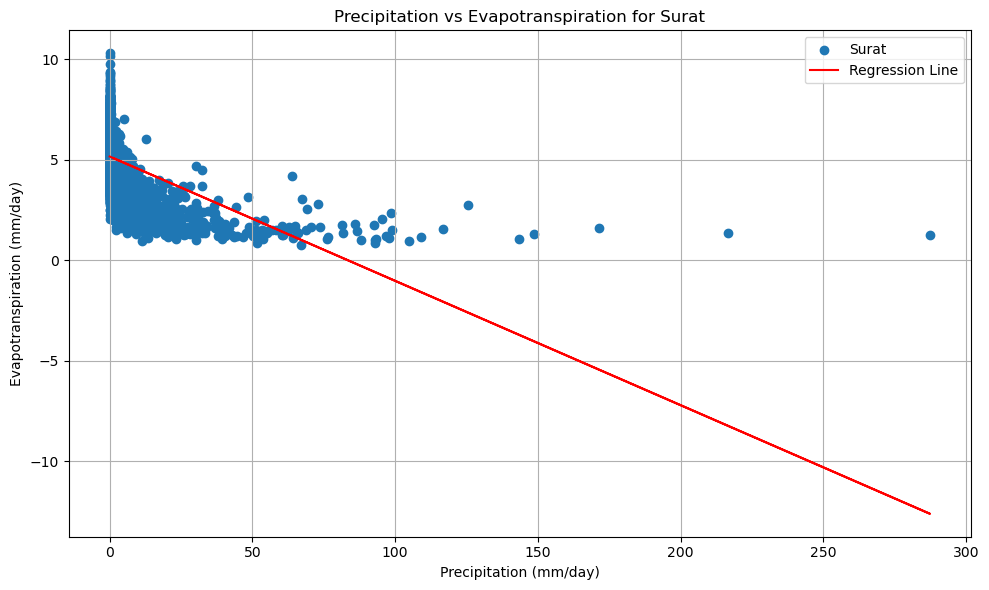

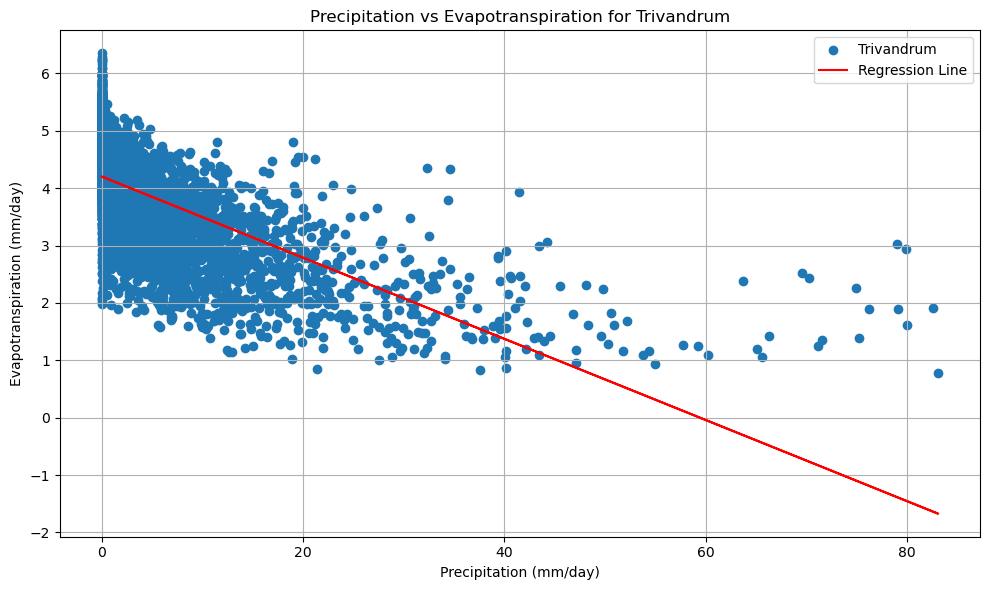

In [39]:
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['precipitation_sum'], group_data['et0_fao_evapotranspiration'], label=city)
    coefficients = np.polyfit(group_data['precipitation_sum'], group_data['et0_fao_evapotranspiration'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    regression_line = slope * group_data['precipitation_sum'] + intercept
    plt.plot(group_data['precipitation_sum'], regression_line, color='red', label='Regression Line')
    plt.title('Precipitation vs Evapotranspiration for %s' % city)
    plt.xlabel('Precipitation (mm/day)')
    plt.ylabel('Evapotranspiration (mm/day)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

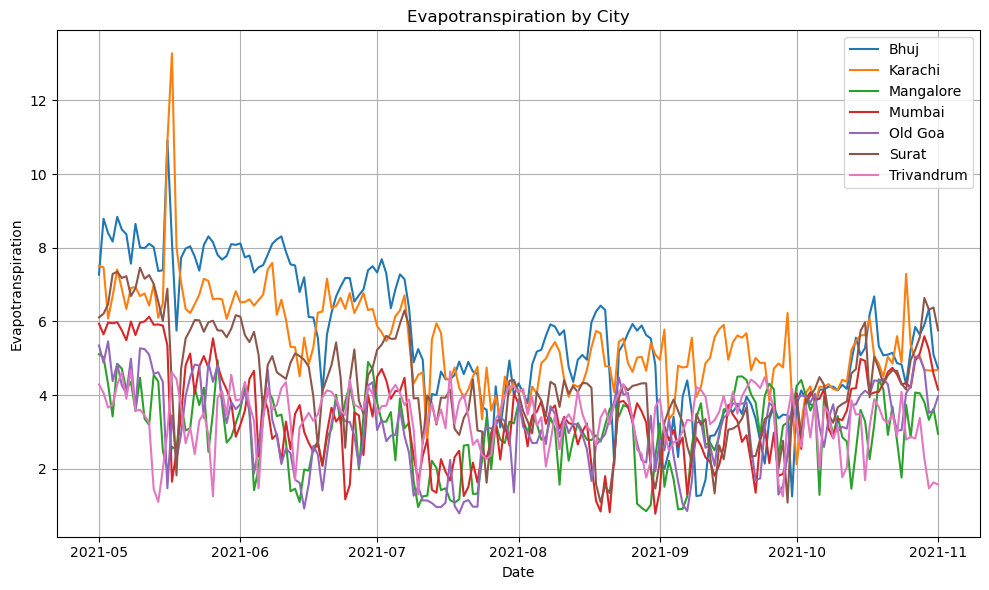

In [40]:
start_date = '5-1-2021'
end_date = '11-1-2021'
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]

plt.figure(figsize=(10, 6))

for city, group_data in filtered_df.groupby('city'):
    plt.plot(group_data['time'], group_data['et0_fao_evapotranspiration'], label=city)

plt.title('Evapotranspiration by City')
plt.xlabel('Date')
plt.ylabel('Evapotranspiration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()